### Importação dos dados



In [172]:
import pandas as pd
import matplotlib.pyplot as plt


urls = {
    'Loja 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'Loja 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'Loja 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'Loja 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

all_stores = {}

for loja, url in urls.items():
    all_stores[loja] = pd.read_csv(url)

#1. Análise do faturamento


Loja 1 R$ 1,534,509.12 
----------------------------------------
Loja 2 R$ 1,488,459.06 
----------------------------------------
Loja 3 R$ 1,464,025.03 
----------------------------------------
Loja 4 R$ 1,384,497.58 
----------------------------------------


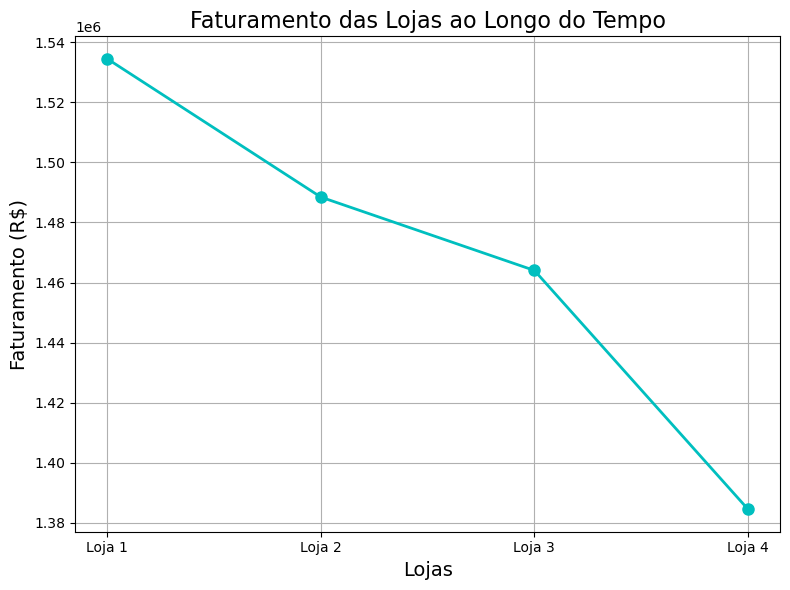

In [182]:
faturamento_loja_1 = all_stores['Loja 1']['Preço'].sum()
faturamento_loja_2 = all_stores['Loja 2']['Preço'].sum()
faturamento_loja_3 = all_stores['Loja 3']['Preço'].sum()
faturamento_loja_4 = all_stores['Loja 4']['Preço'].sum()

faturamento_geral = {
    'Loja 1': faturamento_loja_1,
    'Loja 2': faturamento_loja_2,
    'Loja 3': faturamento_loja_3,
    'Loja 4': faturamento_loja_4,
}

for loja, item in faturamento_geral.items():
    print(f"{loja} R$ {item:,.2f} ")
    print("-" * 40)

faturamento_geral = [faturamento_loja_1, faturamento_loja_2, faturamento_loja_3, faturamento_loja_4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure(figsize=(8, 6))
plt.plot(lojas, faturamento_geral, marker='o', color='c', linestyle='-', linewidth=2, markersize=8)

plt.title('Faturamento das Lojas ao Longo do Tempo', fontsize=16)
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Faturamento (R$)', fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [370]:
for loja, df in all_stores.items():
    categoria = df.groupby('Categoria do Produto').size().sort_values(ascending=False)
    total_venda = categoria.sum()
    porcentagem = (categoria / total_venda * 100).round(2)

    resumo = pd.DataFrame({
        'Quantidade': categoria,
        'Participação (%)': porcentagem
    })

    titulo = f"Loja: {loja}"
    largura = 50
    print("+" + "-" * (largura - 2) + "+")
    print(f"|{titulo:^{largura - 2}}|")
    print("+" + "-" * (largura - 2) + "+")
    print(f"| {'Categoria':<20} | {'Qtd':>6} | {'%':>7} |")
    print("+" + "-" * (largura - 2) + "+")

    for categoria_nome, linha in resumo.iterrows():
        print(f"| {categoria_nome:<20} | {int(linha['Quantidade']):>6} | {linha['Participação (%)']:>6.2f}% |")

    print("+" + "-" * (largura - 2) + "+\n")


+------------------------------------------------+
|                  Loja: Loja 1                  |
+------------------------------------------------+
| Categoria            |    Qtd |       % |
+------------------------------------------------+
| moveis               |    465 |  19.71% |
| eletronicos          |    448 |  18.99% |
| brinquedos           |    324 |  13.73% |
| eletrodomesticos     |    312 |  13.23% |
| esporte e lazer      |    284 |  12.04% |
| instrumentos musicais |    182 |   7.72% |
| livros               |    173 |   7.33% |
| utilidades domesticas |    171 |   7.25% |
+------------------------------------------------+

+------------------------------------------------+
|                  Loja: Loja 2                  |
+------------------------------------------------+
| Categoria            |    Qtd |       % |
+------------------------------------------------+
| moveis               |    442 |  18.74% |
| eletronicos          |    422 |  17.89% |
| brinqued

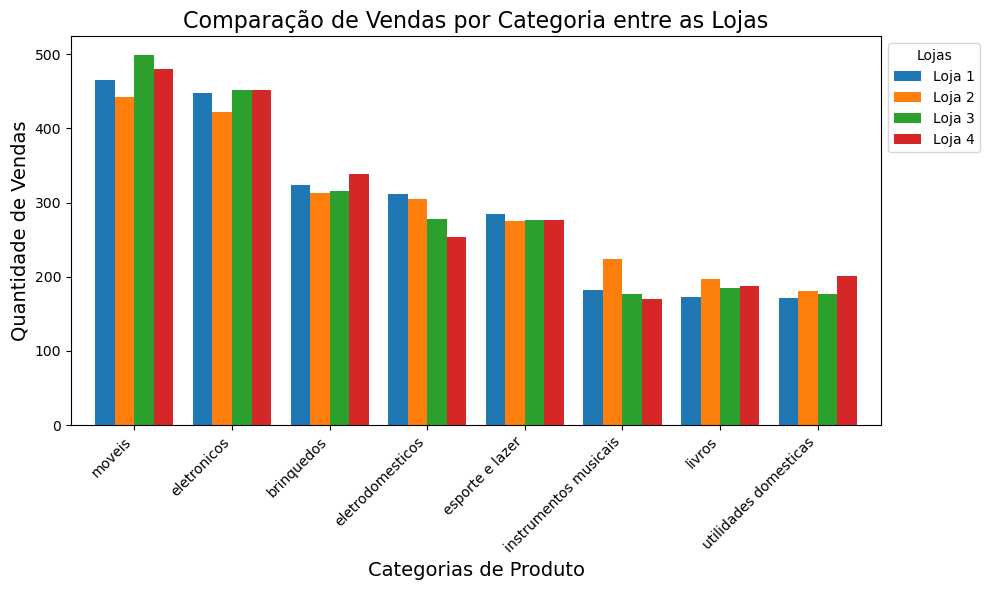

In [264]:
dados_vendas_categoria = {}

for loja, df in all_stores.items():
    vendas_por_categoria = df.groupby("Categoria do Produto").size().sort_values(ascending=False)
    dados_vendas_categoria[loja] = vendas_por_categoria

vendas_categoria_df = pd.DataFrame(dados_vendas_categoria).fillna(0)

vendas_categoria_df = vendas_categoria_df.loc[vendas_categoria_df.sum(axis=1).sort_values(ascending=False).index]

ax = vendas_categoria_df.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title("Comparação de Vendas por Categoria entre as Lojas", fontsize=16)
plt.xlabel("Categorias de Produto", fontsize=14)
plt.ylabel("Quantidade de Vendas", fontsize=14)

plt.legend(title="Lojas", loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()

plt.show()


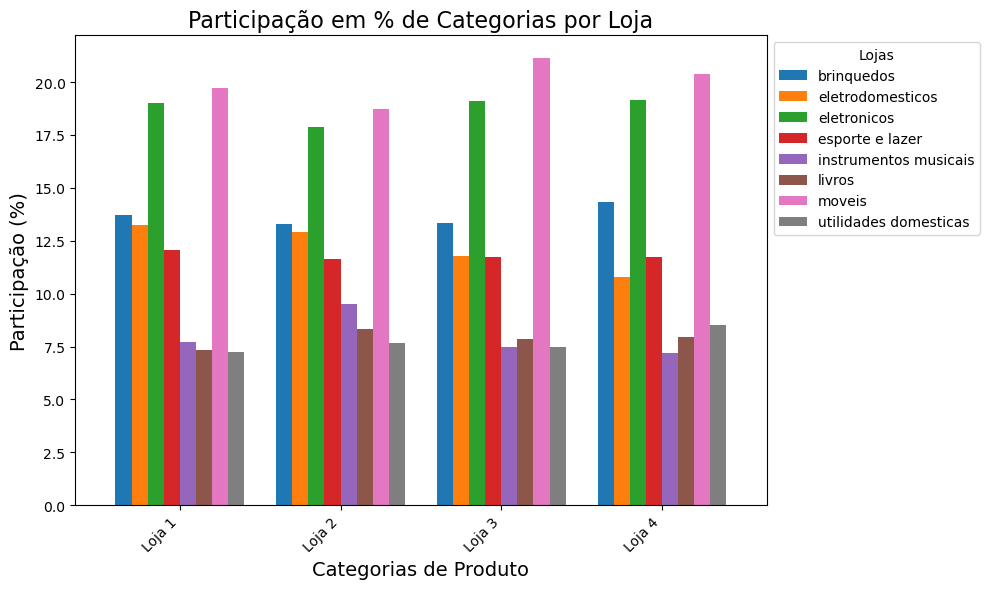

In [268]:
participacao_categoria_df = pd.DataFrame(dados_participacao_categoria).fillna(0)
participacao_categoria_pivot = participacao_categoria_df.T

ax = participacao_categoria_pivot.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title("Participação em % de Categorias por Loja", fontsize=16)
plt.xlabel("Categorias de Produto", fontsize=14)
plt.ylabel("Participação (%)", fontsize=14)

plt.legend(title="Lojas", loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()

plt.show()

# 3. Média de Avaliação das Lojas

In [440]:
print("+" + "-" * 40 + "+")
print(f"|{'Média de Avaliações por Loja':^40}|")
print("+" + "-" * 40 + "+")
for loja, media in medias_series.items():
    print(f"| {loja:<30} {media:>6.2f} |")
print("+" + "-" * 40 + "+")


+----------------------------------------+
|      Média de Avaliações por Loja      |
+----------------------------------------+
| Loja 3                           4.05 |
| Loja 2                           4.04 |
| Loja 4                           4.00 |
| Loja 1                           3.98 |
+----------------------------------------+


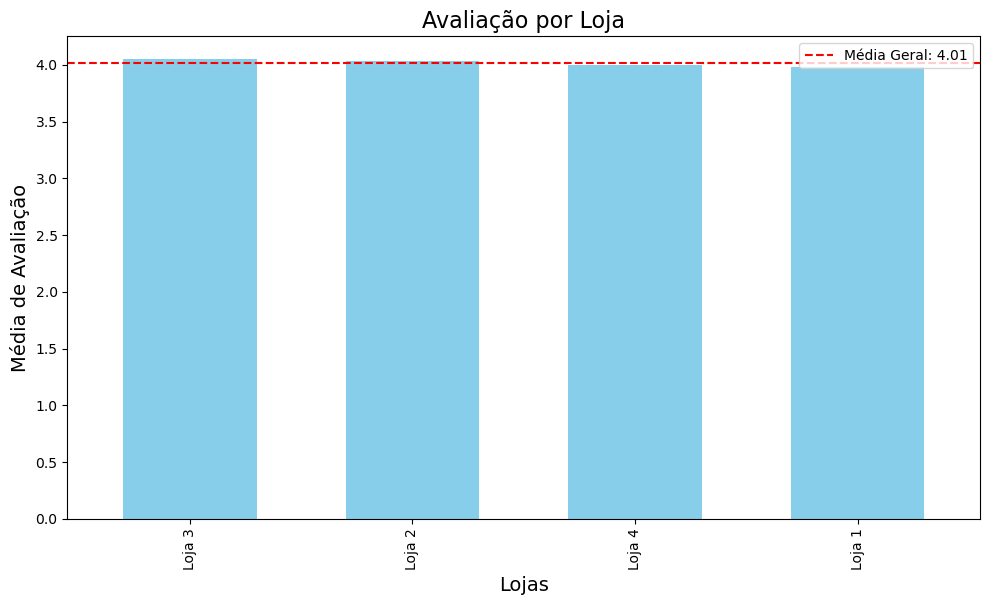

In [402]:
medias_avaliacoes = {}

for loja, avaliacao in all_stores.items():
    media = avaliacao["Avaliação da compra"].mean()
    medias_avaliacoes[loja] = media

medias_ordenadas = pd.Series(medias_avaliacoes).sort_values(ascending=False)
media_geral = medias_ordenadas.mean()

ax = medias_ordenadas.plot(kind='bar', figsize=(10, 6.15), width=0.6, color='skyblue')
plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média Geral: {media_geral:.2f}')
plt.title("Avaliação por Loja", fontsize=16)
plt.xlabel("Lojas", fontsize=14)
plt.ylabel("Média de Avaliação", fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [438]:
largura = 50

for loja, produtos in all_stores.items():
    mais_vendidos = produtos['Produto'].value_counts().head()
    menos_vendidos = produtos['Produto'].value_counts().tail()
    
    print("+" + "-" * (largura - 2) + "+")
    print(f"|{'LOJA: ' + loja:^{largura - 2}}|")
    print("+" + "-" * (largura - 2) + "+")
    
    print(f"| {'Produtos Mais Vendidos':<{largura - 2}}|")
    print("+" + "-" * (largura - 2) + "+")
    for produto, qtd in mais_vendidos.items():
        print(f"| {produto:<35} {qtd:>10} |")
    
    print("+" + "-" * (largura - 2) + "+")
    print(f"| {'Produtos Menos Vendidos':<{largura - 2}}|")
    print("+" + "-" * (largura - 2) + "+")
    for produto, qtd in menos_vendidos.items():
        print(f"| {produto:<35} {qtd:>10} |")
    
    print("+" + "-" * (largura - 2) + "+\n")


+------------------------------------------------+
|                  LOJA: Loja 1                  |
+------------------------------------------------+
| Produtos Mais Vendidos                          |
+------------------------------------------------+
| TV Led UHD 4K                               60 |
| Guarda roupas                               60 |
| Micro-ondas                                 60 |
| Secadora de roupas                          58 |
| Blocos de montar                            56 |
+------------------------------------------------+
| Produtos Menos Vendidos                         |
+------------------------------------------------+
| Ciência de dados com python                 39 |
| Pandeiro                                    36 |
| Panela de pressão                           35 |
| Headset                                     33 |
| Celular ABXY                                33 |
+------------------------------------------------+

+---------------------------

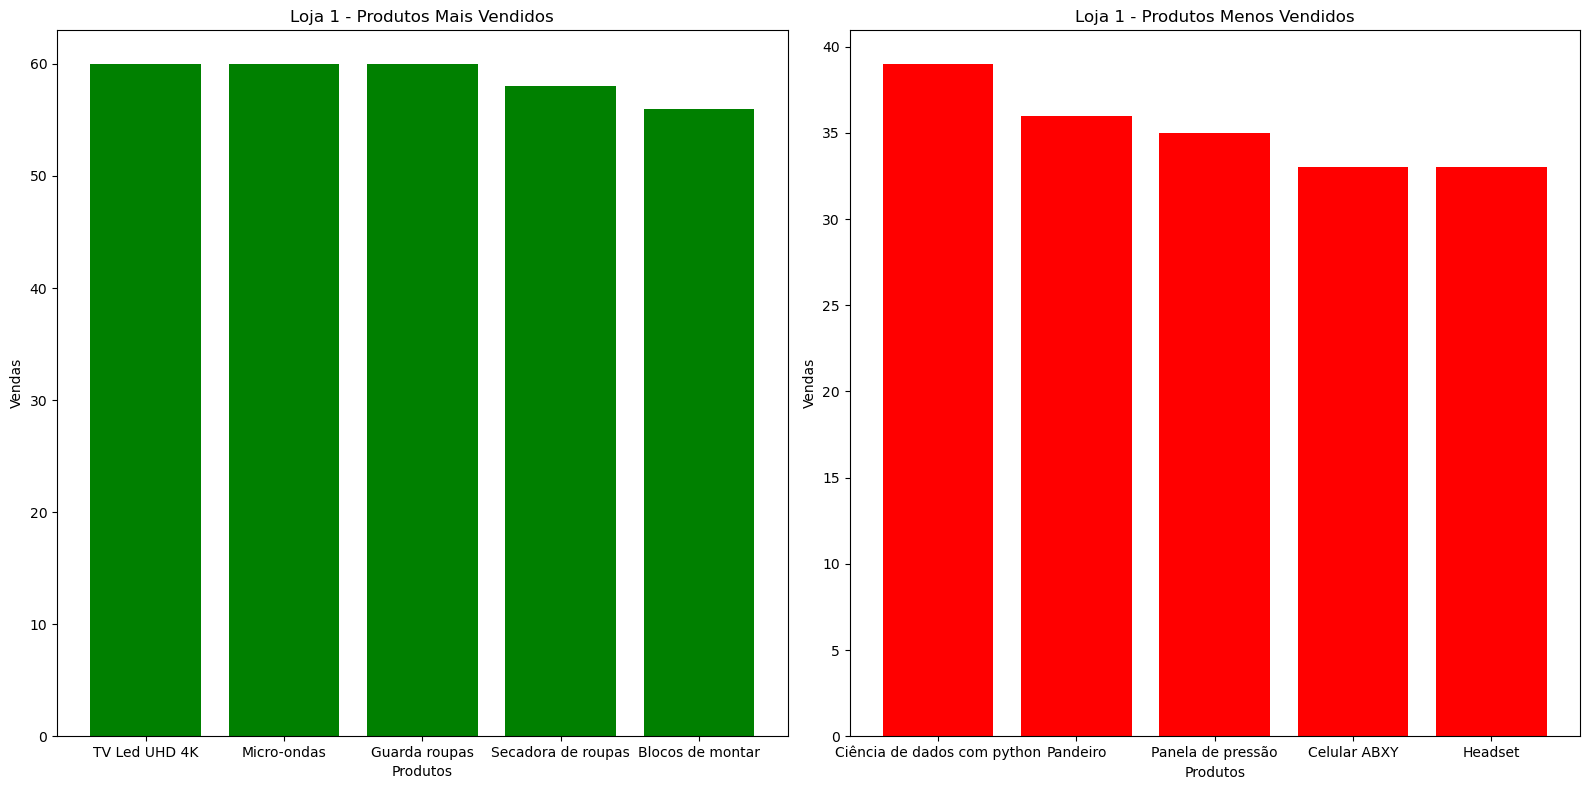

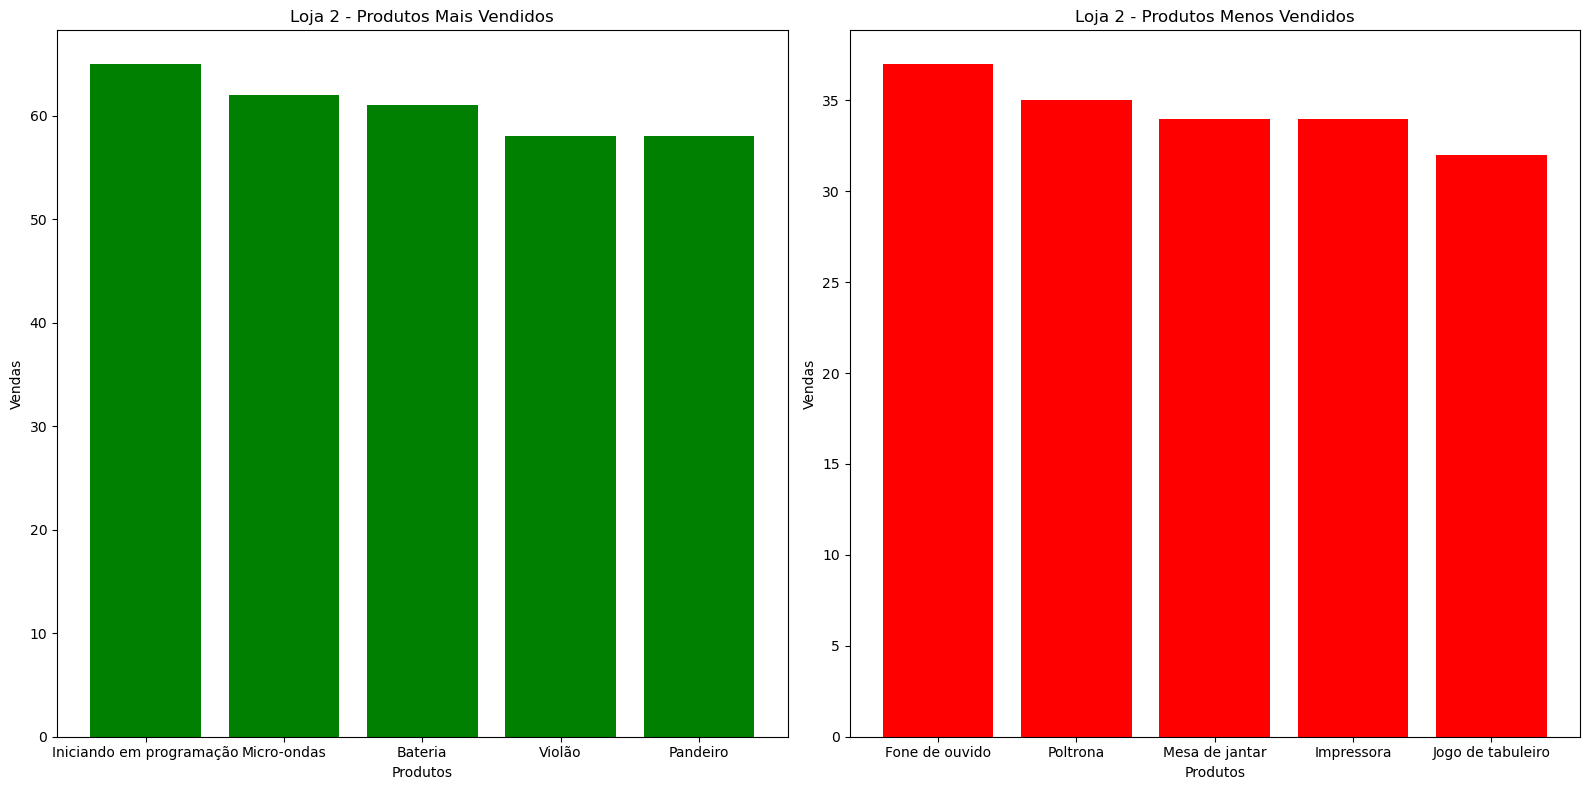

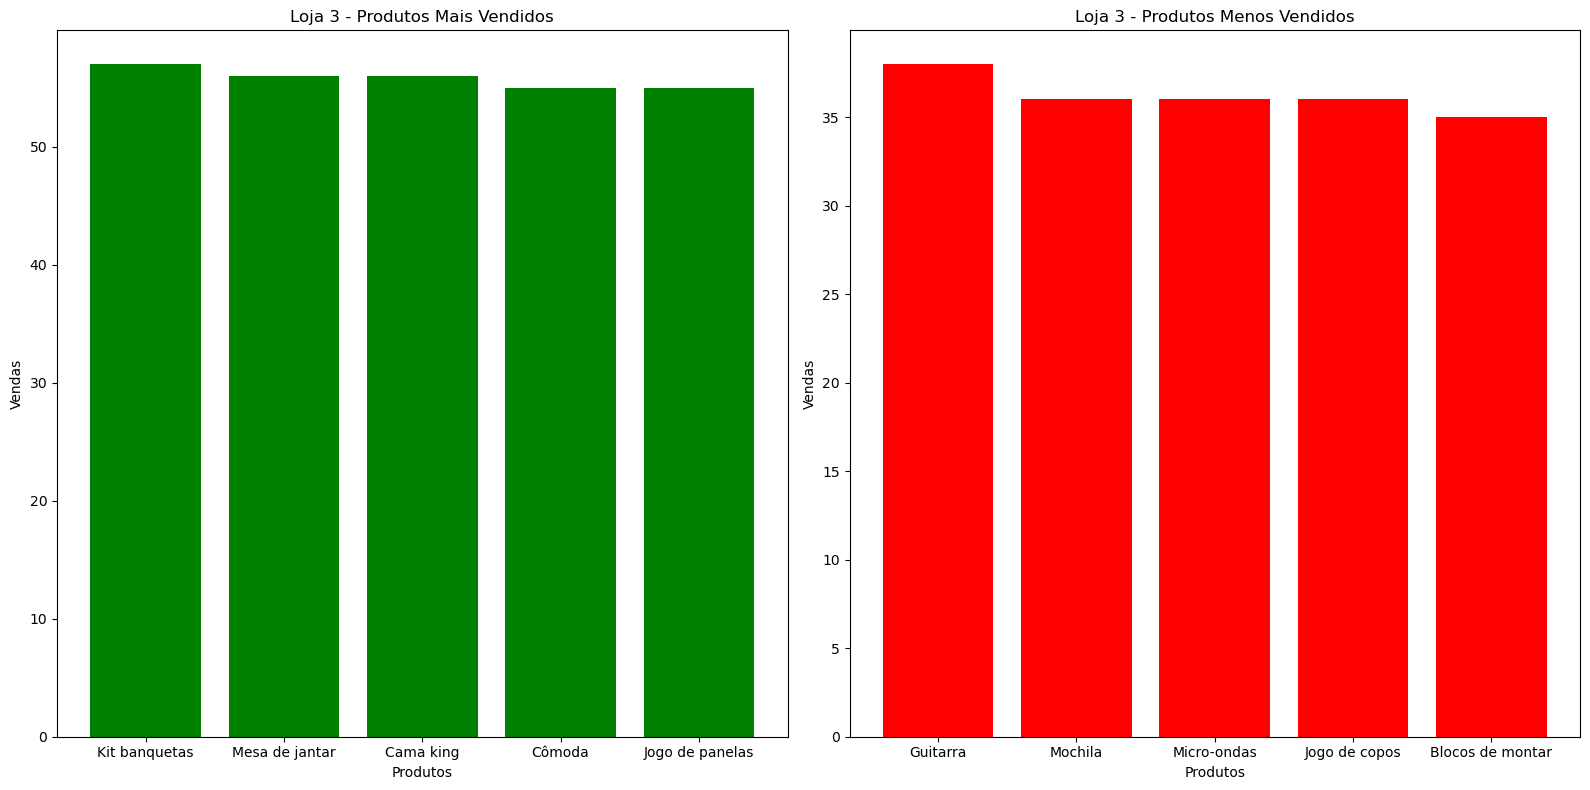

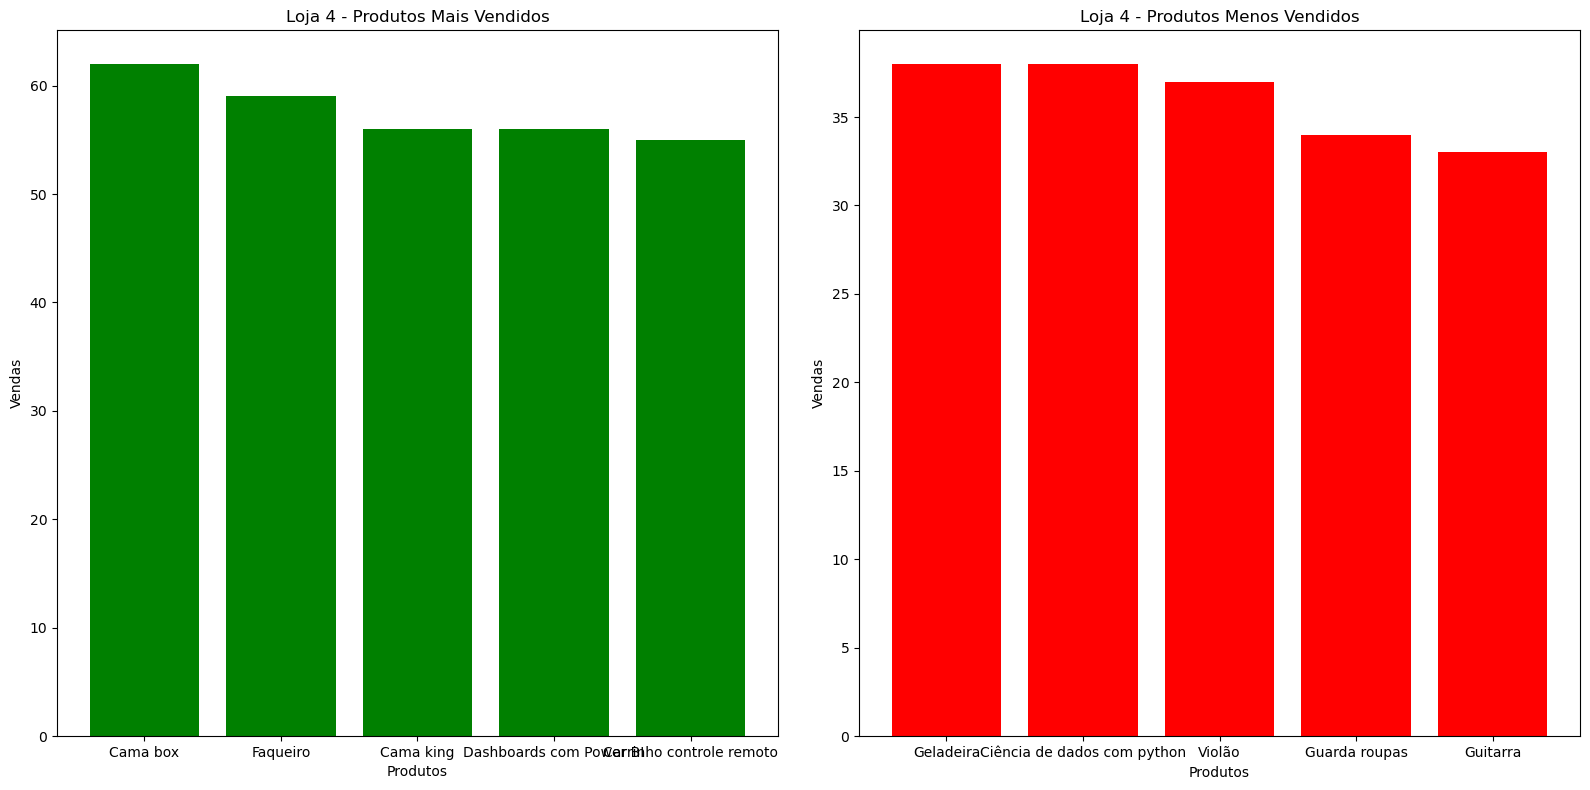

In [256]:

for loja, produtos in all_stores.items():
    
    produtos_mais_vendidos = produtos.groupby('Produto').size().sort_values(ascending=False).head()
    produtos_menos_vendidos = produtos.groupby('Produto').size().sort_values(ascending=False).tail()

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    axes[0].bar(produtos_mais_vendidos.index, produtos_mais_vendidos.values, color='green')
    axes[0].set_title(f"{loja} - Produtos Mais Vendidos")
    axes[0].set_xlabel('Produtos')
    axes[0].set_ylabel('Vendas')

    axes[1].bar(produtos_menos_vendidos.index, produtos_menos_vendidos.values, color='red')
    axes[1].set_title(f"{loja} - Produtos Menos Vendidos")
    axes[1].set_xlabel('Produtos')
    axes[1].set_ylabel('Vendas')

    plt.tight_layout()
    plt.show()

# 5. Frete Médio por Loja


In [260]:
for loja, dados in all_stores.items():
    media_frete = dados['Frete'].mean()
    print("-" * 40)
    print(f"{loja}")
    print(f"Média do valor do frete: R$ {media_frete:.2f}")

----------------------------------------
Loja 1
Média do valor do frete: R$ 34.69
----------------------------------------
Loja 2
Média do valor do frete: R$ 33.62
----------------------------------------
Loja 3
Média do valor do frete: R$ 33.07
----------------------------------------
Loja 4
Média do valor do frete: R$ 31.28


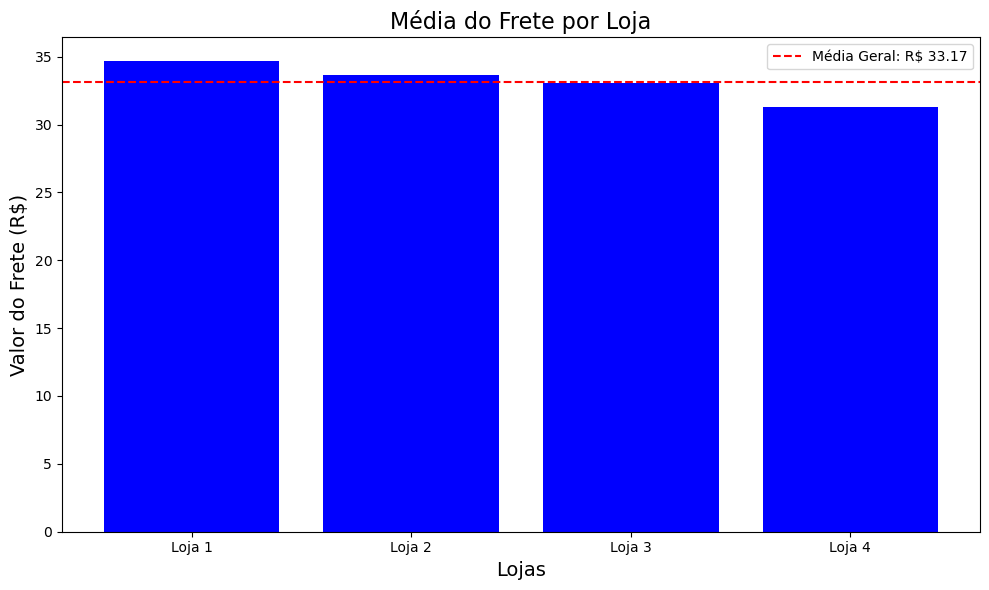

In [262]:
plt.figure(figsize=(10, 6))
plt.bar(media_frete_df.index, media_frete_df.values, color='blue')

plt.axhline(media_frete_geral, color='red', linestyle='--', label=f'Média Geral: R$ {media_frete_geral:.2f}')

plt.title("Média do Frete por Loja", fontsize=16)
plt.xlabel("Lojas", fontsize=14)
plt.ylabel("Valor do Frete (R$)", fontsize=14)

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()